# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 

BoomBikes is a US bike-sharing provider, it has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. It aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.
 

##  Reading and Understanding the Data

Let us first import NumPy and Pandas and read the BikeSharing dataset

In [138]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [139]:
# Import necessary libraries
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from sklearn.metrics import r2_score

In [140]:
df = pd.read_csv("day.csv")

In [141]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe

In [142]:
df.shape

(730, 16)

In [143]:
# Inspect the Columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [144]:
# Quick check on the stats of given dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Validating the Data & Data Preparation

## Date field check

In [145]:
# checking given date data is valid or not, here it is valid.

df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')
df['is_valid_date'] = df['dteday'].notna()
df[df.is_valid_date == False].count()


instant          0
dteday           0
season           0
yr               0
mnth             0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
atemp            0
hum              0
windspeed        0
casual           0
registered       0
cnt              0
is_valid_date    0
dtype: int64

### Creating categorical variables using the data dictionary 

### season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [146]:
def season_upd(season):
    if season == 1:
        return 'spring'
    elif season == 2:
        return 'summer'
    elif season == 3:
        return 'fall'
    elif season == 4:
        return 'winter'
    else:
        return "unknown"
    
df['season_cat'] = df['season'].apply(season_upd)
 

## weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	

In [147]:
def weathersit_upd(weathersit):
    if weathersit == 1:
        return 'clear'
    elif weathersit == 2:
        return 'mist'
    elif weathersit == 3:
        return 'light'
    elif weathersit == 4:
        return 'heavy'
    else:
        return "unknown"
    
df['weathersit_cat'] = df['weathersit'].apply(weathersit_upd)
 

### Year field

In [148]:
df['yr'] = df['yr'].apply(lambda x: 'Yr_2018' if x == 0 else 'Yr_2019' )

In [149]:
df['yr'].value_counts()

Yr_2018    365
Yr_2019    365
Name: yr, dtype: int64

### Month field

In [150]:
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.mnth.head()

0    jan
1    jan
2    jan
3    jan
4    jan
Name: mnth, dtype: object

In [151]:
df['weekday_name'] = df['dteday'].dt.day_name()


## Droping the Season and Weathersit columns

In [152]:
df.shape

(730, 20)

In [153]:
df.drop(['season','weathersit','is_valid_date'], axis = 1, inplace = True)

## Understanding the data by Visualisization
 
- Check if there is some obvious multicollinearity going on
- Check if Predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.


In [154]:
df.shape

(730, 17)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   instant         730 non-null    int64         
 1   dteday          730 non-null    datetime64[ns]
 2   yr              730 non-null    object        
 3   mnth            730 non-null    object        
 4   holiday         730 non-null    int64         
 5   weekday         730 non-null    int64         
 6   workingday      730 non-null    int64         
 7   temp            730 non-null    float64       
 8   atemp           730 non-null    float64       
 9   hum             730 non-null    float64       
 10  windspeed       730 non-null    float64       
 11  casual          730 non-null    int64         
 12  registered      730 non-null    int64         
 13  cnt             730 non-null    int64         
 14  season_cat      730 non-null    object        
 15  weathe

#### Visualising Numeric Variables

   Making pairplot of all the numeric variables

### we can observe that the temp variable having linear relationship with total count

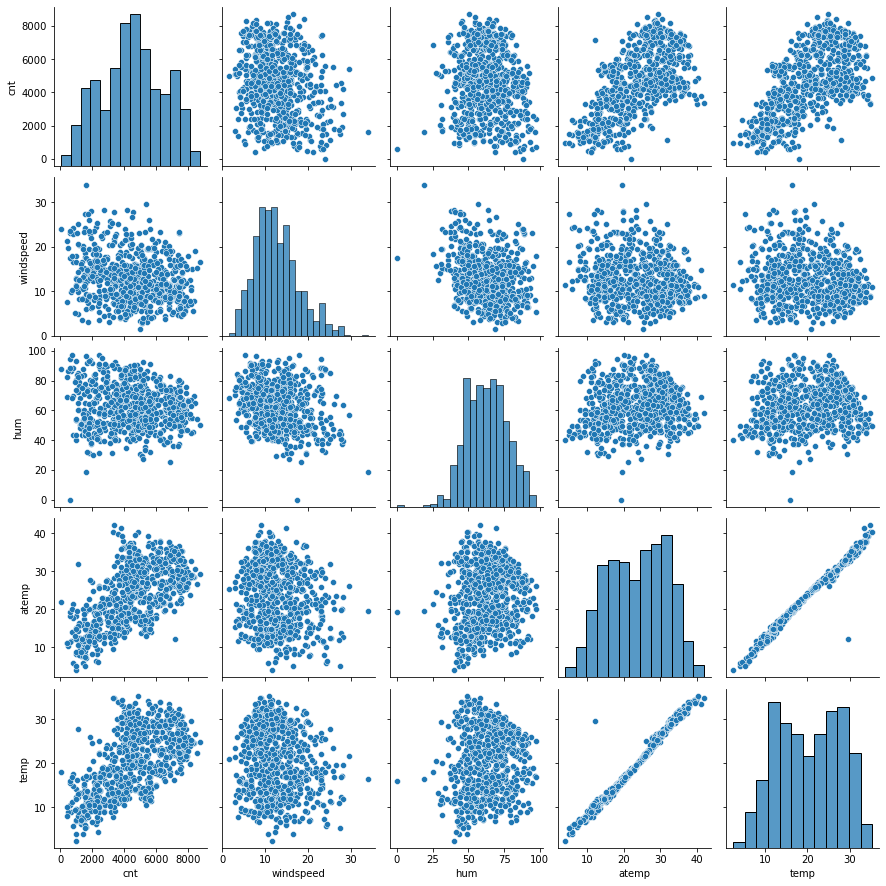

In [156]:
set1 = ['cnt','windspeed','hum','atemp','temp']
sns.pairplot(df[set1])
plt.show()

### To check Casual or Registered counts changes with temp variable

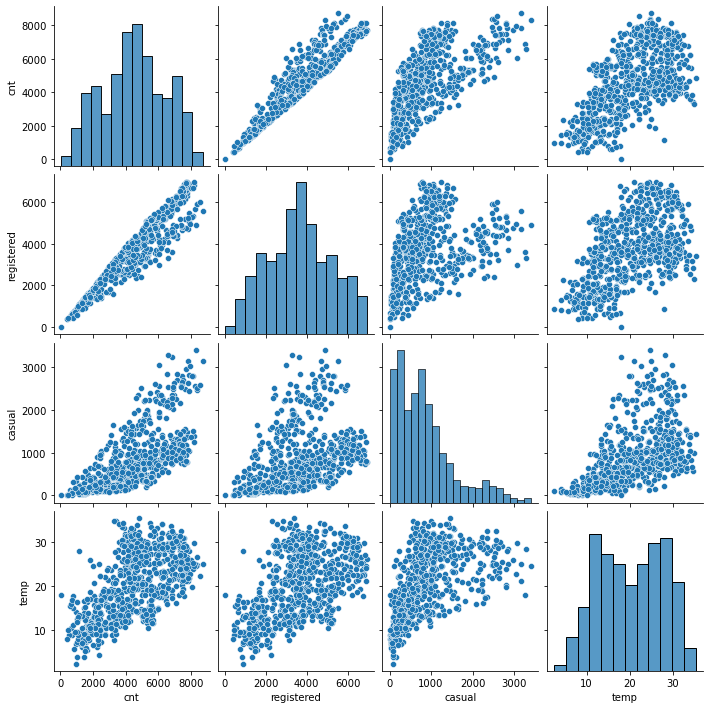

In [157]:
set2 = ['cnt','registered','casual','temp']
sns.pairplot(df[set2])
#plt.show()

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   instant         730 non-null    int64         
 1   dteday          730 non-null    datetime64[ns]
 2   yr              730 non-null    object        
 3   mnth            730 non-null    object        
 4   holiday         730 non-null    int64         
 5   weekday         730 non-null    int64         
 6   workingday      730 non-null    int64         
 7   temp            730 non-null    float64       
 8   atemp           730 non-null    float64       
 9   hum             730 non-null    float64       
 10  windspeed       730 non-null    float64       
 11  casual          730 non-null    int64         
 12  registered      730 non-null    int64         
 13  cnt             730 non-null    int64         
 14  season_cat      730 non-null    object        
 15  weathe

#### Visualising Categorical Variables

Making boxplot

yr : year (0: 2018, 1:2019) -> Season and Weather situation

In [159]:
text_col = ['season_cat','weathersit_cat','weekday_name','mnth','yr']

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

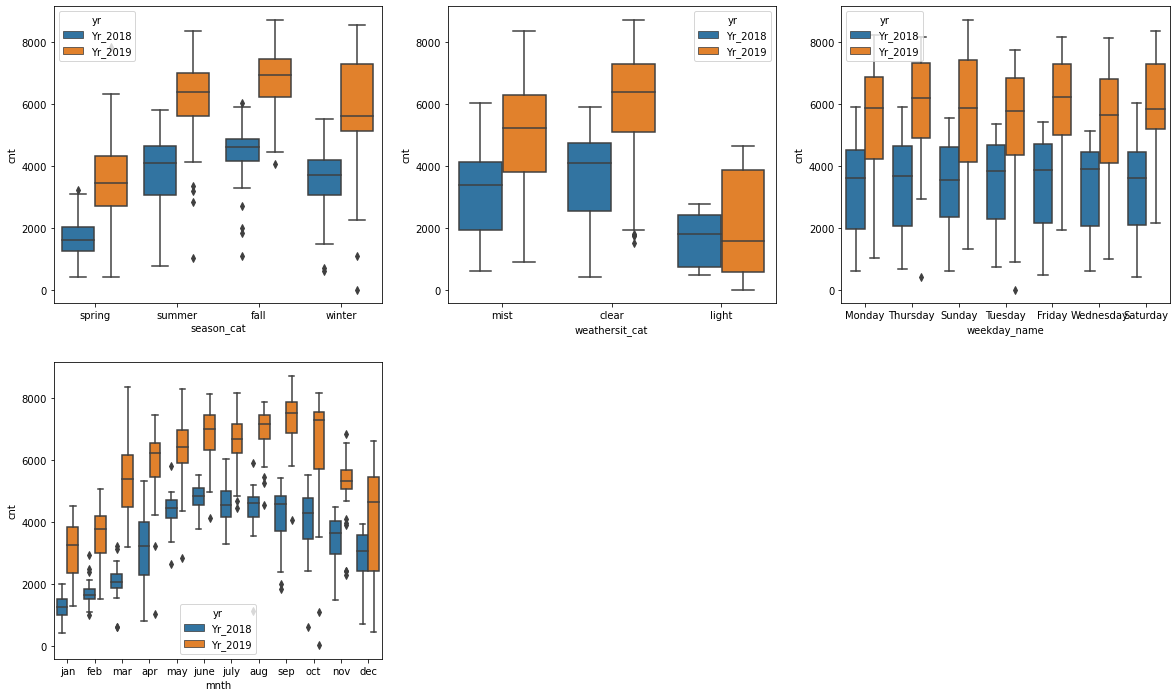

In [160]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season_cat', y = 'cnt', hue = 'yr',data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit_cat', y = 'cnt',hue = 'yr', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday_name', y = 'cnt',hue = 'yr', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt',hue = 'yr', data = df)

#plt.show()

### Checking Mean for each categorical Variable

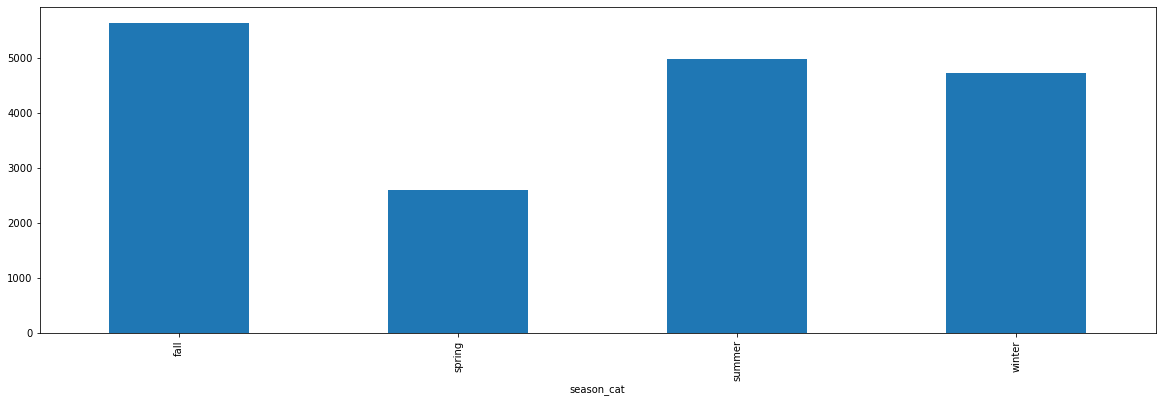

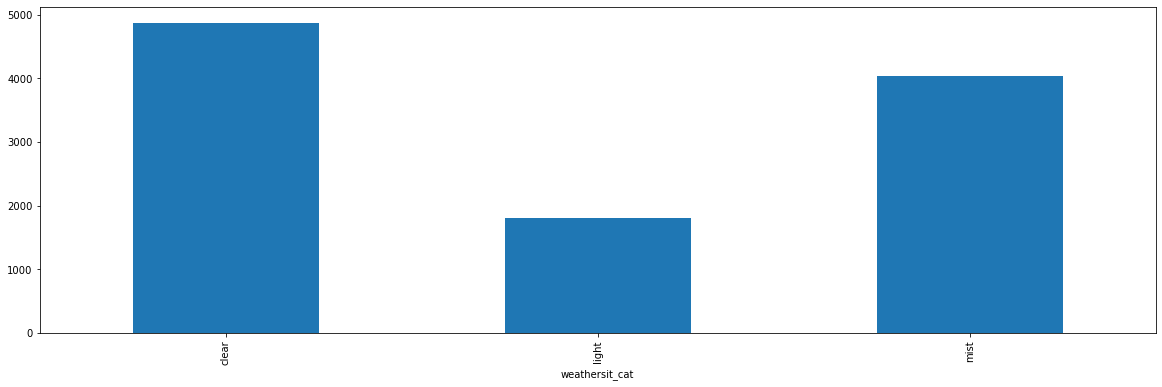

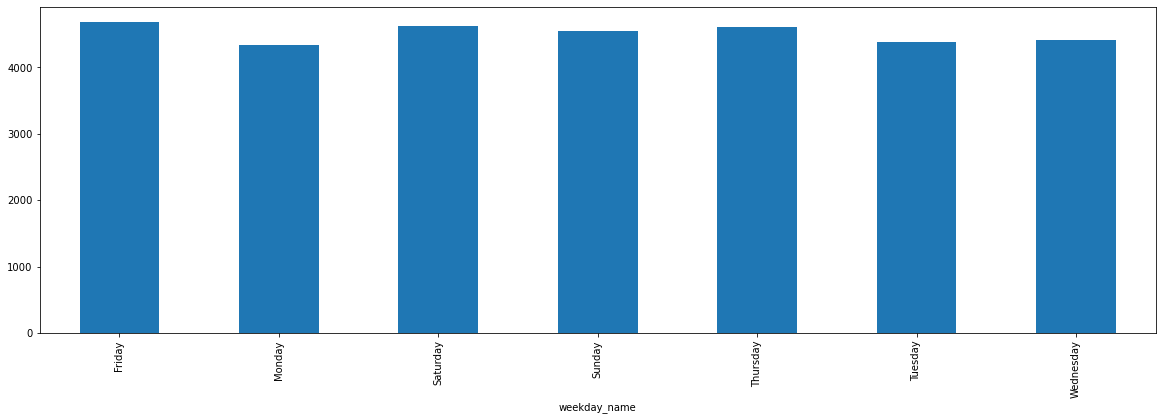

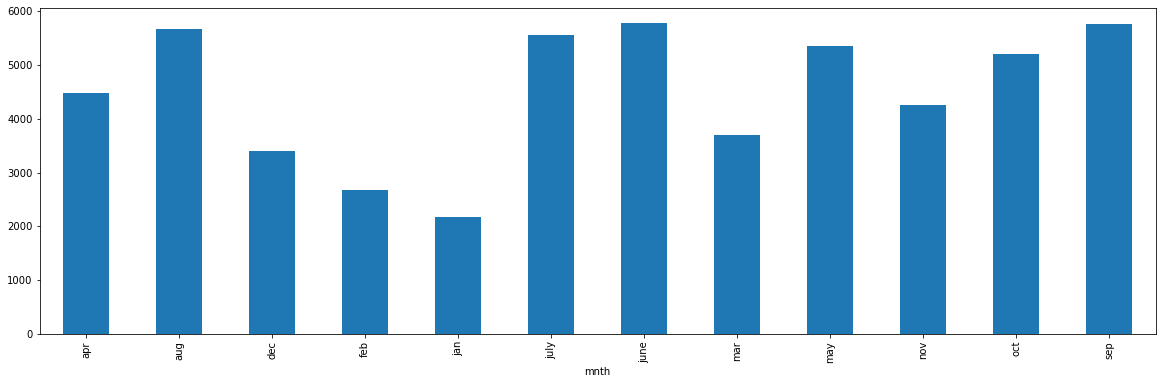

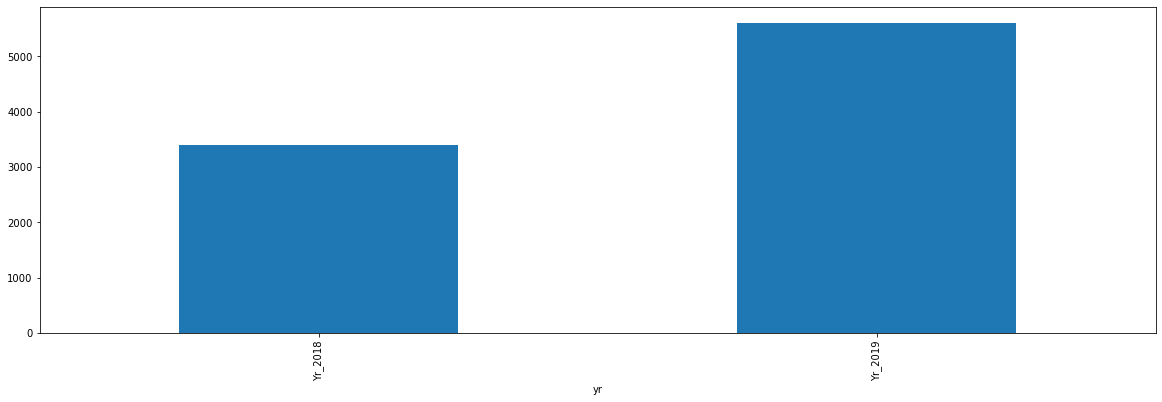

In [161]:
for catval in text_col:
    plt.figure(figsize=(20, 6))
    df.groupby([catval])['cnt'].mean().plot(kind="bar")
    plt.show()    

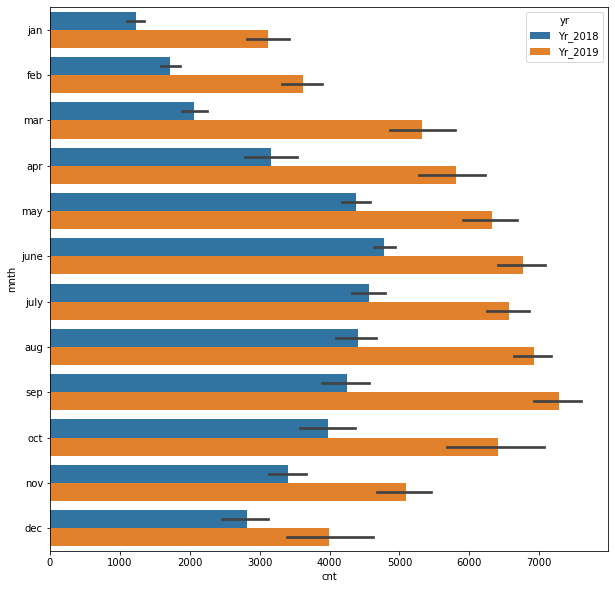

In [162]:
plt.figure(figsize=(10,10))
sns.barplot(y=df['mnth'], x=df["cnt"],hue=df['yr'])
plt.show()

### Additional Data Preparation

    - Creating Dummy variables for categorical - Season and weather situation

In [163]:
# Check the bike dataframe now

df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_cat,weathersit_cat,weekday_name
0,1,2018-01-01,Yr_2018,jan,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,mist,Monday
1,2,2018-02-01,Yr_2018,jan,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,mist,Thursday
2,3,2018-03-01,Yr_2018,jan,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,clear,Thursday
3,4,2018-04-01,Yr_2018,jan,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,clear,Sunday
4,5,2018-05-01,Yr_2018,jan,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,clear,Tuesday


### Dummy Variables

The variable `weathersit_cat` & `season_cat` have four levels. Converting these levels into integers, using Dummy Variables. And also creating dummy variables for `month name` and `day name`

In [164]:
print ("seasons: \n", df.season_cat.value_counts())
print ("weath sit: \n" , df.weathersit_cat.value_counts())
print ("month name: \n", df.mnth.value_counts())
print ("day name: \n", df.weekday_name.value_counts())

seasons: 
 fall      188
summer    184
spring    180
winter    178
Name: season_cat, dtype: int64
weath sit: 
 clear    463
mist     246
light     21
Name: weathersit_cat, dtype: int64
month name: 
 jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: mnth, dtype: int64
day name: 
 Monday       105
Tuesday      105
Thursday     104
Sunday       104
Friday       104
Wednesday    104
Saturday     104
Name: weekday_name, dtype: int64


In [165]:
WeatherSituation = pd.get_dummies(df['weathersit_cat'], drop_first = True)
Season = pd.get_dummies(df['season_cat'], drop_first = True)
Year = pd.get_dummies(df['yr'],drop_first = True)
Months = pd.get_dummies(df.mnth,drop_first = True)
Day = pd.get_dummies(df['weekday_name'],drop_first = True)

In [166]:
# Check what the datasets looks like
Season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [167]:
WeatherSituation.head()

,light,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [168]:
Year.head()

,Yr_2019
0,0
1,0
2,0
3,0
4,0


In [169]:
Months.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [170]:
# Add the results to the original housing dataframe

df = pd.concat([df, WeatherSituation], axis = 1)
df = pd.concat([df, Season], axis = 1)
df = pd.concat([df, Year], axis = 1)
df = pd.concat([df, Months],axis = 1)
df = pd.concat([df, Day],axis = 1)



In [171]:
# head of dataset
df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_cat,weathersit_cat,weekday_name,light,mist,spring,summer,winter,Yr_2019,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,2018-01-01,Yr_2018,jan,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,mist,Monday,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,2018-02-01,Yr_2018,jan,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,mist,Thursday,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,2018-03-01,Yr_2018,jan,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,clear,Thursday,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,Yr_2018,jan,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,clear,Sunday,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,2018-05-01,Yr_2018,jan,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,clear,Tuesday,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Drop Categorical variables also with additional

In [172]:
df.drop(['season_cat','weathersit_cat','yr','weekday','dteday','instant','casual','registered','mnth','weekday_name'], axis = 1, inplace = True)

In [173]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,light,mist,spring,summer,winter,Yr_2019,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


## Splitting the Data into Training and Testing Sets

In [174]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Rescaling 'temp', 'atemp', 'hum', 'windspeed' features with Min-Max scaling  

In [175]:
from sklearn.preprocessing import MinMaxScaler

In [176]:
scaler = MinMaxScaler()

In [177]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
 
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [178]:
pd.set_option('display.max_columns', None)
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,light,mist,spring,summer,winter,Yr_2019,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [179]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,light,mist,spring,summer,winter,Yr_2019,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.029412,0.343137,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.156863,0.133333,0.139216,0.147059,0.133333,0.145098
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.169124,0.475223,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.364028,0.340268,0.346511,0.354512,0.340268,0.352545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


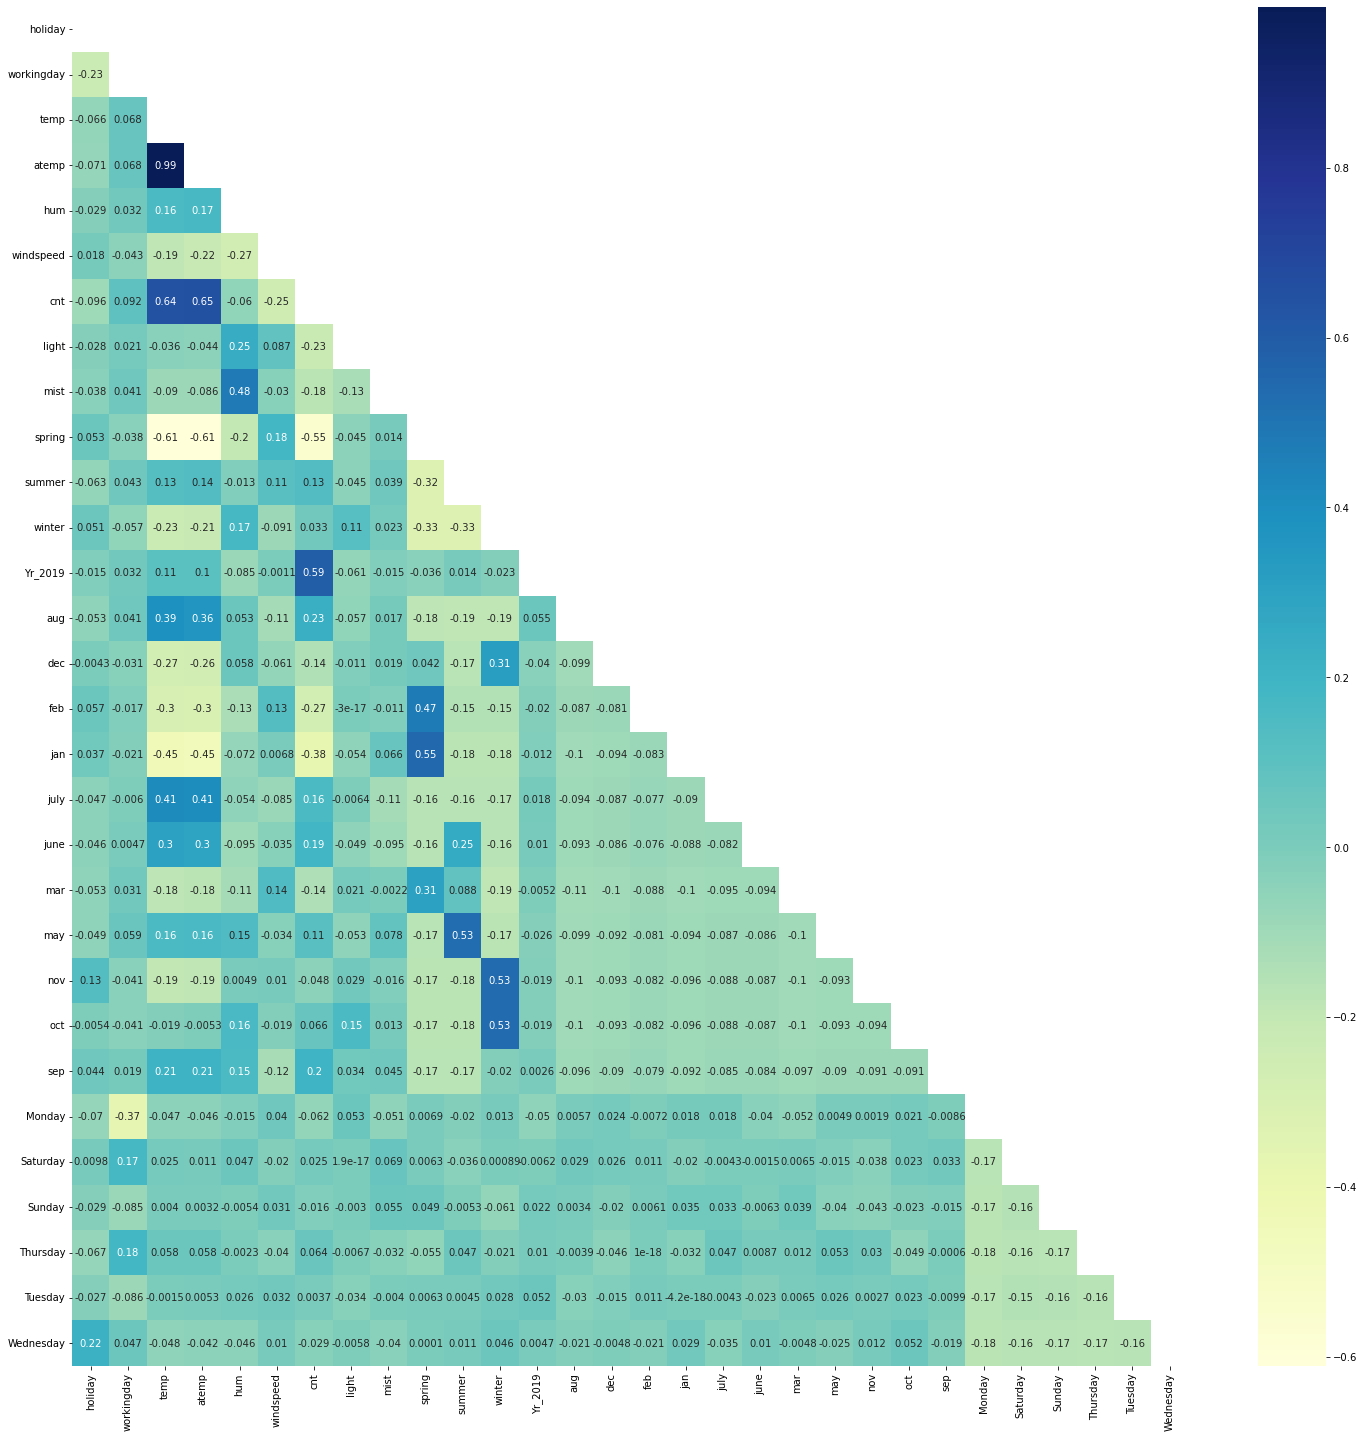

In [180]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

As we can see the Cnt correlated with temp

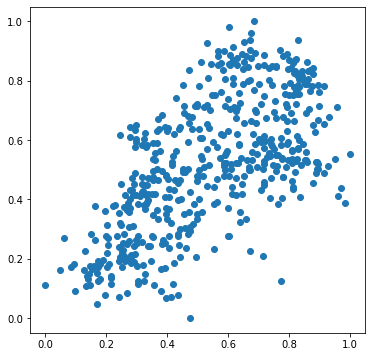

In [181]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

## Selecting features using RFE - Recursive Feature Elimination

### Starting wtih 12 Features

In [182]:
y_train = df_train.pop('cnt')
X_train = df_train

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=12)

rfe = rfe.fit(X_train, y_train)

In [183]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('light', True, 1),
 ('mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Yr_2019', True, 1),
 ('aug', False, 9),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 18),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 13),
 ('sep', True, 1),
 ('Monday', False, 15),
 ('Saturday', False, 12),
 ('Sunday', False, 16),
 ('Thursday', False, 17),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11)]

In [184]:
# selecting the final columns
final_cols = X_train.columns[rfe.support_]
print(final_cols)

Index(['holiday', 'temp', 'hum', 'windspeed', 'light', 'mist', 'spring',
       'summer', 'winter', 'Yr_2019', 'july', 'sep'],
      dtype='object')


In [185]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [186]:
X_train_rfe = X_train[final_cols]

In [187]:
X_train_rfe.head()

,holiday,temp,hum,windspeed,light,mist,spring,summer,winter,Yr_2019,july,sep
653,0,0.509887,0.575354,0.300794,0,0,0,0,1,1,0,0
576,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,1,0
426,0,0.442393,0.640189,0.255342,0,1,1,0,0,1,0,0
728,0,0.245101,0.498067,0.663106,0,0,1,0,0,1,0,0
482,0,0.395666,0.504508,0.188475,0,1,0,1,0,1,0,0


# Build a linear model

    - with the reduced featured - RFE X TRAIN

In [188]:
X_train_lm1 = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm1).fit()

lr_1.params

const        0.284133
holiday     -0.097404
temp         0.530017
hum         -0.171023
windspeed   -0.181924
light       -0.238245
mist        -0.054175
spring      -0.056249
summer       0.051942
winter       0.098745
Yr_2019      0.229346
july        -0.057536
sep          0.083036
dtype: float64

In [189]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.69e-190
Time:                        21:32:30   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

### Adjusted R2 - 83.3% & P values are <0.05

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [190]:
# Check for the VIF values of the feature variables. 
calculateVIF(X_train_rfe)

,Features,VIF
2,hum,28.06
1,temp,16.02
3,windspeed,4.65
6,spring,4.01
8,winter,3.35
7,summer,2.78
5,mist,2.28
9,Yr_2019,2.08
10,july,1.58
11,sep,1.38


### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop. 
- Humidity is 28.06 to be droped

In [191]:
# Dropping highly correlated variables and insignificant variables

X_train_new = X_train_rfe.drop('hum', 1)

In [192]:
# Build a third fitted model
X_train_lm2 = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()

In [193]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.40e-187
Time:                        21:32:31   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

In [194]:
# Calculate the VIFs again for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.09
2,windspeed,4.60
6,summer,2.21
5,spring,2.08
8,Yr_2019,2.07
7,winter,1.79
9,july,1.58
4,mist,1.55
10,sep,1.34
3,light,1.08


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [195]:
y_train_pred = lr_2.predict(X_train_lm2)

Text(0.5, 0, 'Errors')

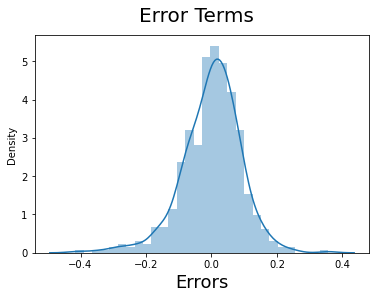

In [196]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

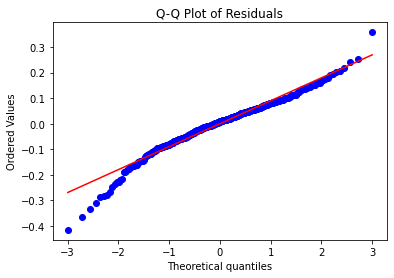

In [197]:
# Create Q-Q plot
import scipy.stats as stats
residuals = y_train - y_train_pred
# Flatten residuals array for Q-Q plot
residuals_flat = residuals.ravel()

stats.probplot(residuals_flat, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

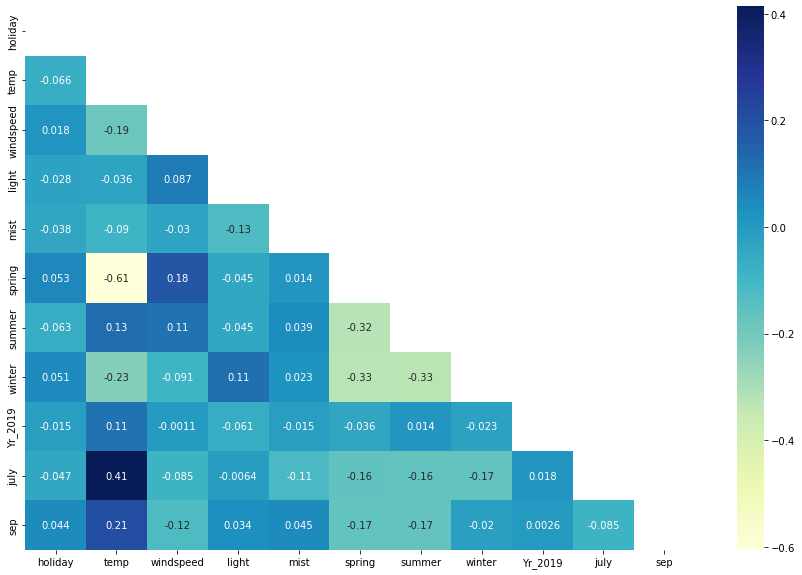

In [198]:
plt.figure(figsize = (15, 10))
matrix = np.triu(X_train_new.corr())
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [199]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [200]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,light,mist,spring,summer,winter,Yr_2019,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.027397,0.319635,0.255708,0.264840,0.232877,0.479452,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.109589,0.164384,0.150685,0.132420,0.168950,0.136986
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.163612,0.467403,0.437258,0.442259,0.423633,0.500722,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.313092,0.371472,0.358561,0.339723,0.375566,0.344621
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
y_test = df_test.pop('cnt')
X_test = df_test

In [202]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm2 = sm.add_constant(X_test)

In [203]:
y_pred = lr_2.predict(X_test_lm2)

In [204]:
Testr2 = round(r2_score(y_test, y_pred),4)

# MODEL EVALUATION

Text(0, 0.5, 'y_pred')

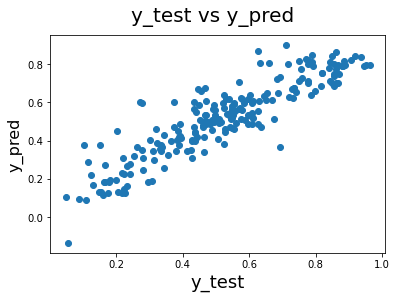

In [205]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [206]:
round(lr_2.params,4)

const        0.1996
holiday     -0.0980
temp         0.4915
windspeed   -0.1480
light       -0.2852
mist        -0.0816
spring      -0.0669
summer       0.0453
winter       0.0831
Yr_2019      0.2335
july        -0.0524
sep          0.0767
dtype: float64

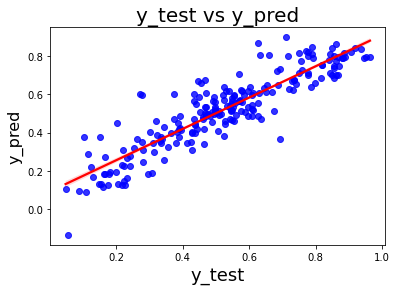

In [207]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [208]:
# Calculating Adjusted-R^2 value for the test dataset

Testr2 = round(r2_score(y_test, y_pred),4) 

Trainr2 = round(r2_score(y_train,y_train_pred),4)

adjusted_Test_r2 = round(1-(1-Testr2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
adjusted_Train_r2 = round(1-(1-Trainr2)*(X_train_new.shape[0]-1)/(X_train_new.shape[0]-X_train_new.shape[1]-1),4)

print("R2          - TRAIN:", Trainr2)
print("Adjusted R2 - TRAIN:", adjusted_Train_r2)

print("R2          - TEST :", Testr2)
print("Adjusted R2 - TEST :", adjusted_Test_r2)




R2          - TRAIN: 0.8358
Adjusted R2 - TRAIN: 0.8322
R2          - TEST : 0.8049
Adjusted R2 - TEST : 0.7945


# Conclusion -

# Bike Demand Features and their weights -

## Bike_Demand = 0.1996 + temp * 0.4915 +	Yr_2019 * 0.2335 +	winter * 0.0831 +	sep * 0.0767 +	summer * 0.0453 -	july * 0.0524 -	spring * 0.0669 -	mist * 0.0816 -	holiday * 0.098 -	windspeed * 0.148 -	light * 0.2852

Conclusion:

    - Bike Demand would increase with Temperature, in Yr 2019, Winter and During September and Summer.
    - Bike Demand would decrease in July month, 
        - And During Spring and Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist and holidays, windspeed
        - And with Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather.


In [209]:
from scipy.stats import pearsonr
r, p_value = pearsonr(X_train_new['temp'], y_train)

print(f"Pearson's R: {r}")
print(f"P-value: {p_value}")

Pearson's R: 0.6435170928988447
P-value: 5.801276506739973e-61
